<a href="https://colab.research.google.com/github/NimePeter/Credit-Card-Fraud/blob/main/Copy_of_IDD_Peter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies **

Very important, makes code availabe from one module to another, make code productive, and productive.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Valid = 0", "Fraud = 1"]

**Reading CSV file with pandas**

Storing csv file onto credit card data

In [3]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

**CSV File Attached with googel colab notebook.**

Attached csv file from google drive on to google colab with a copy of it attached on to the google dirve. Thus the csv file will still be attached when resuming. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Dataset on to a Pandas DataFrame.**

Pandas is a library in the python that help us to do analysis on the given data.

**Data Exploration**

Following data display all the transection withine a given time.

In [5]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Observation**

Following method autimatically display first five rows and column of the credit card fraud detection data.

In [6]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(credit_card_data.shape)
print(credit_card_data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

In [8]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
credit_card_data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

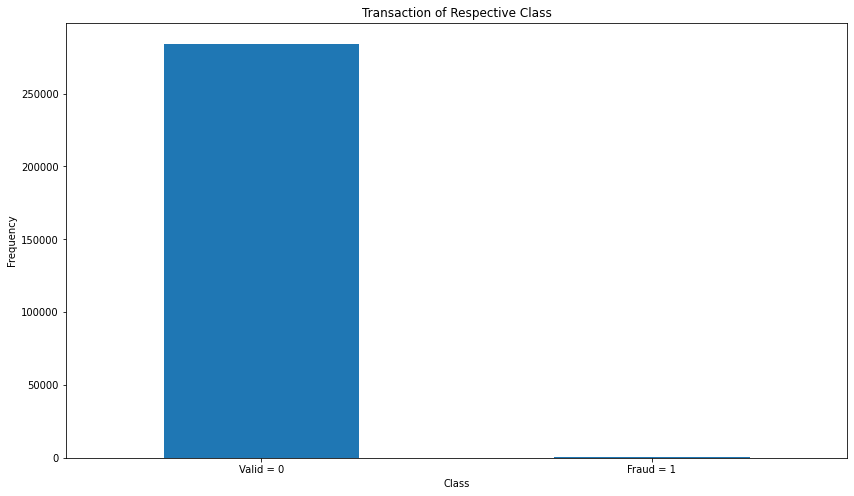

In [10]:
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction of Respective Class")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

Pre-Processing 

In [11]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
# Determine number of fraud cases in dataset
fraud = credit_card_data[credit_card_data['Class'] == 1]
valid = credit_card_data[credit_card_data['Class'] == 0]
print('Fraud Cases: {}'.format(len(credit_card_data[credit_card_data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(credit_card_data[credit_card_data['Class'] == 0])))

Fraud Cases: 492
Valid Transactions: 284315


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

Apply statistic method to fraudlant data


In [13]:
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Apply statistic method to valid data

In [14]:
print(valid.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Compare the value for both transection

In [15]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Since it is an unbalance data set, will used undersampeling method

extract equal amount data set (fraud, legit) sample   with  equal amount of data set to test it out as a sample. 

In [16]:
valid_sample = valid.sample(n=492)

Concatenating fraud & valid transection

In [17]:
new_dataset = pd.concat([valid_sample, fraud], axis = 0)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
147852,89074.0,2.116647,-0.708282,-1.064776,-0.529370,-0.924563,-1.049131,-0.909877,-0.130872,0.119226,...,0.244747,0.776288,0.109877,-0.121247,-0.180263,-0.084232,0.028575,-0.011533,24.99,0
280357,169475.0,-1.253656,1.659853,-0.759297,-0.894091,-0.042169,-0.716739,0.322649,0.667050,0.211405,...,-0.302047,-0.653562,0.102671,-0.443861,-0.318869,0.136893,0.146572,-0.089877,9.87,0
156113,107320.0,0.561245,-2.294192,-1.128155,1.646305,-0.183282,1.863571,-0.004351,0.260216,1.808907,...,0.570877,0.649821,-0.444567,-1.659722,-0.496809,-0.560342,-0.045809,0.052541,666.00,0
276429,167082.0,-0.101992,0.229509,0.193868,-1.724997,0.593206,0.095006,0.236032,-0.118317,-1.674623,...,0.402809,1.108163,-0.537579,-1.312490,0.093391,0.180035,0.013420,0.106297,13.90,0
24194,33111.0,-0.668922,-0.841643,1.059913,-2.769396,-0.626371,0.021406,0.295494,0.190244,-0.631728,...,-0.304769,-0.679544,0.597219,-0.359728,-0.854755,-0.393657,0.143549,0.166144,159.80,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97091.666667,-0.039935,0.077264,-0.064609,-0.076627,0.054496,0.062181,-0.054943,0.031122,-0.015629,...,-0.036420,0.079564,-0.032603,-0.001239,0.001758,0.000213,-0.052201,-0.003285,-0.014299,75.857358
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Divide the data into target and features 

In [22]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [23]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
147852   89074.0  2.116647 -0.708282 -1.064776 -0.529370 -0.924563 -1.049131   
280357  169475.0 -1.253656  1.659853 -0.759297 -0.894091 -0.042169 -0.716739   
156113  107320.0  0.561245 -2.294192 -1.128155  1.646305 -0.183282  1.863571   
276429  167082.0 -0.101992  0.229509  0.193868 -1.724997  0.593206  0.095006   
24194    33111.0 -0.668922 -0.841643  1.059913 -2.769396 -0.626371  0.021406   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [24]:
print(Y)

147852    0
280357    0
156113    0
276429    0
24194     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


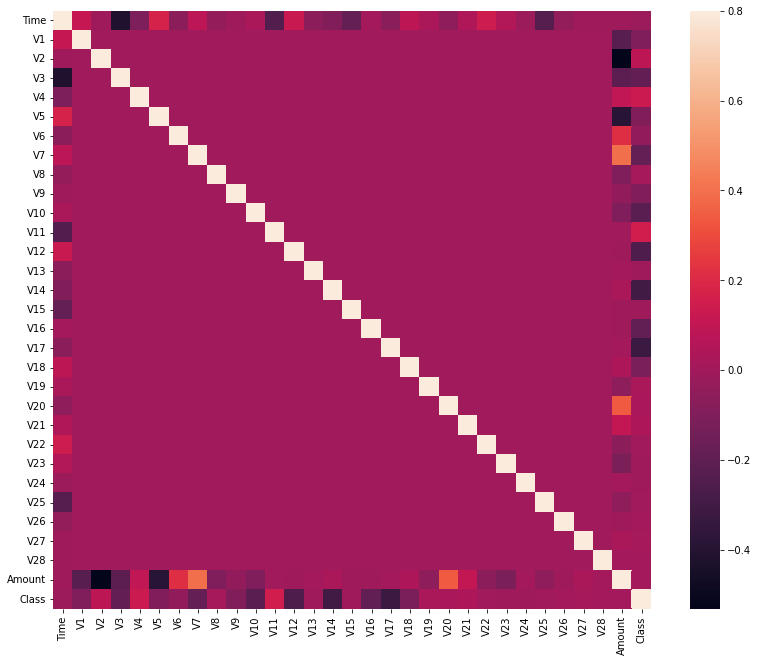

In [25]:
# Correlation matrix
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (14, 11))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [26]:
#separating the X and the Y values
#X = credit_card_data.drop(['Class'], axis = 1) 
#Y = credit_card_data["Class"] 
#print(X.shape) 
#print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
#xData = X.values 
#yData = Y.values 

In [27]:
#training and testing data bifurcation
from sklearn.model_selection import train_test_split 
#split the data into training and testing sets 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 4) 

In [28]:
print(X.shape, X_Train.shape, X_Test.shape)

(984, 30) (787, 30) (197, 30)


In [29]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(X_Train, Y_Train) 
#predictions 
yPred = rfc.predict(X_Test) 


In [30]:
#building all kinds of evaluating parameters
#from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != Y_Test).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(Y_Test, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(Y_Test, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_Test, yPred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(Y_Test, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(Y_Test, yPred) 
print("The Matthews correlation coefficient is {} ".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.949238578680203
The precision is 0.9888888888888889
The recall is 0.9081632653061225
The F1-Score is 0.946808510638298
The Matthews correlation coefficient is 0.9014132454115249 


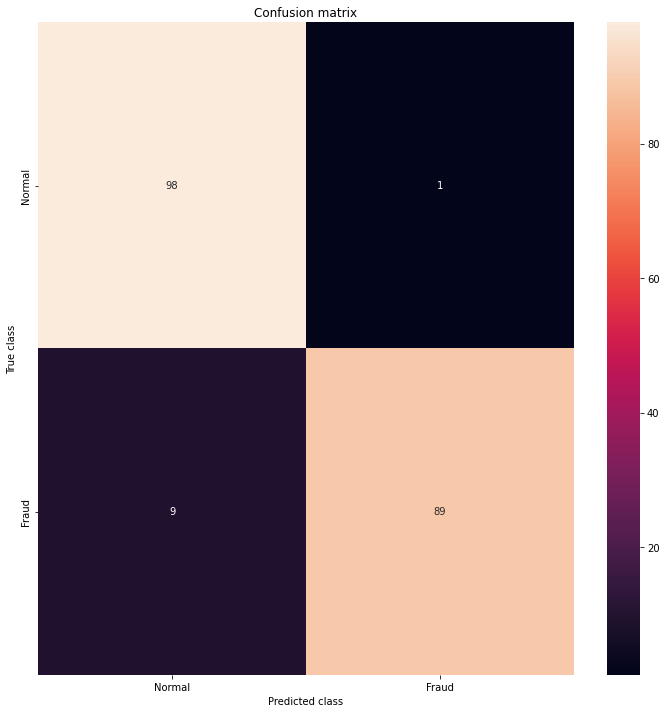

In [31]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_Test, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#Hyperparameter Tuning 
Is mainly dealing with optimal perfomrance of the hyperparameters (higher values) of value models  of parameter that learning algorithms use.

Two features will be use in tuning the hypaparameter, max_features (number of features that will be use to construct the preditctions model). While n_estimators is the number of trees that will be using to construct the prediction model.

GridSearchCV - Mainly search through the given set of concrete parameter value from the given set of grid parameter. In our case will use max_estimators & n_estimators. 

In [39]:
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,7,1)
n_estimators_range = np.arange(10,240,10)
param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range)

rfc = RandomForestClassifier(max_features = 6, n_estimators = 100)

grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 6)

In [40]:
grid.fit(X_Train, Y_Train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(max_features=6),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230])})

In [41]:
print("The best parameters are %s with the score of %0.2f " % (grid.best_params_, grid.best_score_)) 

The best parameters are {'max_features': 4, 'n_estimators': 30} with the score of 0.95 


#Dataframe of Grid Search Parameters & their Accuracy Scores 
From here will be exporting the grid search parameters and their resulting accuracy score inot the dataframe. 

In [42]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,1,10,0.926276
1,1,20,0.935172
2,1,30,0.932637
3,1,40,0.933900
4,1,50,0.937707


#Sorting Data for the contour (horizontal margine) the plots

before constructing contour plots, we will adjust the data into more convenient  form to flow well with  contour plot functions.

Firstly, we will be using Pandas' groupby() function to segment the data into groups based on the 2 hyperparameters: max_features and n_estimators.

In [43]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.926276
             20            0.935172
             30            0.932637
             40            0.933900
             50            0.937707
...                             ...
6            190           0.941543
             200           0.942806
             210           0.939008
             220           0.941553
             230           0.941543

[138 rows x 1 columns]

#Pivoting/tabling  the data
table the data  into an m by n matrix where rows and columns correspond to the max_features and n_estimators, respectively.

In [44]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.926276  0.935172  0.932637  0.933900  0.937707  0.938989   
2             0.941534  0.946594  0.944059  0.939008  0.937727  0.940261   
3             0.942777  0.933910  0.941524  0.942816  0.946603  0.940271   
4             0.933919  0.938979  0.947876  0.935192  0.941553  0.941534   
5             0.937717  0.938989  0.940261  0.942796  0.944069  0.942806   
6             0.936464  0.937736  0.937727  0.936454  0.936454  0.941534   

                                                      ...                      \
n_estimators       70        80        90        100  ...       140       150   
max_features                                          ...                       
1             0.936435  0.930093  0.938989  0.933910  ...  0.941524  0.937717   
2             0.944069  0.941524  0.945331  0.945350  ...  0.944088  0.941543   
3             0.942806  0.942796  0.937736  0.941514  ...  0.942806  0.941543   
4             0.940271  0.945341  0.944069  0.941543  ...  0.940261  0.944078   
5             0.942806  0.938999  0.941534  0.942816  ...  0.939008  0.945341   
6             0.940252  0.946623  0.940261  0.938999  ...  0.939018  0.940271   

                                                                          \
n_estimators       160       170       180       190       200       210   
max_features                                                               
1             0.940261  0.941514  0.945341  0.938989  0.938989  0.938989   
2             0.941524  0.940261  0.942796  0.942787  0.945341  0.944069   
3             0.944069  0.942796  0.945341  0.942806  0.942796  0.942806   
4             0.941524  0.942806  0.942806  0.940271  0.942806  0.944069   
5             0.940281  0.942806  0.942806  0.941534  0.942816  0.940271   
6             0.940261  0.940271  0.944078  0.941543  0.942806  0.939008   

                                  
n_estimators       220       230  
max_features                      
1             0.940252  0.940271  
2             0.945341  0.944069  
3             0.942806  0.937736  
4             0.941543  0.941553  
5             0.938999  0.941543  
6             0.941553  0.941543  

[6 rows x 23 columns]

#Now we can assign the pivoted data into the respective x, y and z variables.

In [50]:
X = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

#2D Contour Plot
lets visualizing the landscape of the 2 hyperparameters that we are tuning and their influence on the accuracy score.

In [51]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

#3D Surface Plot
now let us view the graph in 3D surface plot. It's interest cause we can rotate the plot in the graph

In [52]:
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

#Model Training for Logistic Regression

#Training Logistic Regression with training data

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_Train, Y_Train)

LogisticRegression()

#Model Evaluation & Accuracy Score

In [35]:
#Accuracy score on training data
X_Train_Prediction = model.predict(X_Train)
Training_Data_Accuracy = accuracy_score(X_Train_Prediction, Y_Train)

In [36]:
print('Accuracy score on Training Data : ', Training_Data_Accuracy)

Accuracy score on Training Data :  0.9174078780177891


In [37]:
#Accuracy score on testing data
X_Test_Prediction = model.predict(X_Test)
Test_Data_Accuracy = accuracy_score(X_Test_Prediction, Y_Test)

In [38]:
print('Accuracy score on Training Data: ', Test_Data_Accuracy)

Accuracy score on Training Data:  0.9137055837563451
